In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
from scipy.interpolate import PchipInterpolator as pchip
from scipy.signal import medfilt
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ddir = '/swot/SUM05/takaya/Geotraces/'

In [20]:
comdir = '/swot/SUM02/takaya/SOCCOM/SIO'
pf = pd.read_csv(op.join(comdir,'../Fronts/pf.txt'), delim_whitespace=True, 
                 nrows=968, header=None, dtype=float, names=['lon','lat'])
saf = pd.read_csv(op.join(comdir,'../Fronts/saf.txt'), delim_whitespace=True, 
                 nrows=1079, header=None, dtype=float, names=['lon','lat'])

In [5]:
df = pd.read_excel(op.join(ddir,'TAGLIABUE_FE_DATABASE_JUN2015_PUBLIC.xlsx'), skiprows=3)
df

month  year  long (degE)  Lat (degN)     depth  dFe (nM)  \
0          1  2001      -45.300     30.0000     1.000     0.700   
1          1  2001      -45.300     30.0000    41.000     0.590   
2          1  2001      -45.300     30.0000    63.000     0.400   
3          1  2001      -45.300     30.0000    77.000     0.380   
4          1  2001      -45.300     30.0000   165.000     0.420   
5          1  2001      -45.300     30.0000   250.000     0.430   
6          1  2001      -45.300     30.0000   450.000     0.420   
7          1  2001      -45.300     30.0000   850.000     0.570   
8          1  2001      -45.300     30.0000   950.000     0.590   
9          1  2001      -45.300     30.0000  1050.000     0.530   
10         1  2001      -45.300     10.2000     1.000     0.560   
11         1  2001      -45.300     10.2000    30.000     0.700   
12         1  2001      -45.000     10.2000   130.000     1.120   
13         1  2001      -45.000     10.2000   165.000     1.010   
14         1  2001      -45.000     10.2000   200.000     1.230   
15         1  2001      -45.000     10.2000   250.000     1.090   
16         1  2001      -45.000     10.2000   375.000     1.230   
17         1  2001      -45.000     10.2000   525.000     1.110   
18         1  2001      -45.000     10.2000   725.000     1.060   
19         1  2001      -45.000     10.2000   850.000     1.160   
20         1  2001      -45.000     10.2000  1050.000     1.010   
21         1  2001      -45.000     10.2000  1250.000     0.980   
22         1  2001      -45.000     10.2000  1500.000     0.770   
23         1  2001      -45.000     10.2000  1750.000     0.700   
24         1  2001      -45.000     10.2000  3400.000     0.860   
25         1  2001      -45.000     10.2000  4200.000     0.630   
26         7  2001      -45.000     30.0000     1.000     0.530   
27         7  2001      -45.000     30.0000     2.000     0.510   
28         7  2001      -45.000     30.0000     2.000     0.530   
29         7  2001      -45.000     30.0000     4.000     0.560   
...      ...   ...          ...         ...       ...       ...   
18622      1  2014      178.455    -66.3045    10.383     0.040   
18623      1  2014      178.455    -66.3045    25.252     0.021   
18624      1  2014      178.455    -66.3045    50.713     0.022   
18625      1  2014      178.455    -66.3045    75.980     0.038   
18626      1  2014      178.455    -66.3045   101.147     0.034   
18627      1  2014      178.455    -66.3045   151.562     0.133   
18628      1  2014      178.455    -66.3045   202.329     0.140   
18629      1  2014      178.455    -66.3045   252.613     0.150   
18630      1  2014      178.455    -66.3045   303.394     0.179   
18631      1  2014      178.455    -66.3045   353.586     0.176   
18632      1  2014      178.455    -66.3045   404.456     0.197   
18633      1  2014      173.484    -65.4938    10.043     0.044   
18634      1  2014      173.484    -65.4938    30.112  -999.000   
18635      1  2014      173.484    -65.4938    30.259  -999.000   
18636      1  2014      173.484    -65.4938    30.303  -999.000   
18637      1  2014      173.484    -65.4938    30.161  -999.000   
18638      1  2014      173.484    -65.4938    30.434  -999.000   
18639      1  2014      173.484    -65.4938    30.278     0.026   
18640      1  2014      173.484    -65.4938    50.006     0.025   
18641      1  2014      173.484    -65.4938    75.346     0.048   
18642      1  2014      173.484    -65.4938   100.955     0.073   
18643      1  2014      173.484    -65.4938   202.129     0.128   
18644      1  2014      173.484    -65.4938   304.214     0.182   
18645      1  2014      165.398    -64.2863    10.013     0.066   
18646      1  2014      165.398    -64.2863    35.813     0.035   
18647      1  2014      165.398    -64.2863    55.536     0.034   
18648      1  2014      165.398    -64.2863    76.415     0.047   
18649      1  2014      165.398    -64.2863   111.413 

In [6]:
dfSO = df.loc[df['Lat (degN)'] < -40.]
dfSO

month  year  long (degE)  Lat (degN)    depth  dFe (nM)  \
121       10  1995       69.830    -49.1200   30.000    12.580   
122       10  1995       72.670    -47.7300   40.000     0.460   
123       10  1995       71.800    -48.5000   40.000     0.520   
124       10  1995       71.800    -47.8000   40.000     0.990   
125       10  1995       69.980    -48.3000   40.000     6.390   
126       10  1995       71.020    -48.0000   40.000     5.300   
127       10  1995       71.170    -48.7000   40.000     2.710   
128       10  1995       71.800    -49.1300   40.000     0.580   
129       10  1995       72.670    -48.4700   40.000     0.710   
130       10  1995       73.580    -48.0000   40.000     4.110   
131       10  1995       71.020    -49.3300   40.000     7.650   
132       10  1995       70.500    -48.9000   50.000     8.800   
137        2  1999      140.000    -61.0000    0.000     0.080   
138        1  1999      140.000    -61.0000   10.000     0.050   
139        1  1999      140.000    -61.0000   10.000     0.110   
140        1  1999      140.000    -61.0000   10.000     0.080   
222        4  1999       20.000    -49.3300   20.000     0.180   
223        4  1999       20.000    -49.8300   20.000     0.050   
224        4  1999       18.500    -60.0000   20.000     0.180   
225        4  1999        6.130    -70.2300   20.000     0.170   
226        4  1999       20.000    -48.8300   20.000     0.430   
227        4  1999       20.000    -54.0000   20.000     0.290   
228        4  1999        0.000    -67.0000   25.000     0.060   
229        4  1999       20.000    -49.3300   40.000     0.130   
230        4  1999       20.000    -48.8300   40.000     0.240   
231        4  1999       20.000    -49.8300   40.000     0.090   
232        4  1999       20.000    -54.0000   40.000     0.280   
233        4  1999        6.130    -70.2300   40.000     0.120   
234        4  1999        0.000    -67.0000   50.000     0.200   
235        4  1999        6.130    -70.2300   60.000     0.320   
...      ...   ...          ...         ...      ...       ...   
18622      1  2014      178.455    -66.3045   10.383     0.040   
18623      1  2014      178.455    -66.3045   25.252     0.021   
18624      1  2014      178.455    -66.3045   50.713     0.022   
18625      1  2014      178.455    -66.3045   75.980     0.038   
18626      1  2014      178.455    -66.3045  101.147     0.034   
18627      1  2014      178.455    -66.3045  151.562     0.133   
18628      1  2014      178.455    -66.3045  202.329     0.140   
18629      1  2014      178.455    -66.3045  252.613     0.150   
18630      1  2014      178.455    -66.3045  303.394     0.179   
18631      1  2014      178.455    -66.3045  353.586     0.176   
18632      1  2014      178.455    -66.3045  404.456     0.197   
18633      1  2014      173.484    -65.4938   10.043     0.044   
18634      1  2014      173.484    -65.4938   30.112  -999.000   
18635      1  2014      173.484    -65.4938   30.259  -999.000   
18636      1  2014      173.484    -65.4938   30.303  -999.000   
18637      1  2014      173.484    -65.4938   30.161  -999.000   
18638      1  2014      173.484    -65.4938   30.434  -999.000   
18639      1  2014      173.484    -65.4938   30.278     0.026   
18640      1  2014      173.484    -65.4938   50.006     0.025   
18641      1  2014      173.484    -65.4938   75.346     0.048   
18642      1  2014      173.484    -65.4938  100.955     0.073   
18643      1  2014      173.484    -65.4938  202.129     0.128   
18644      1  2014      173.484    -65.4938  304.214     0.182   
18645      1  2014      165.398    -64.2863   10.013     0.066   
18646      1  2014      165.398    -64.2863   35.813     0.035   
18647      1  2014      165.398    -64.2863   55.536     0.034   
18648      1  2014      165.398    -64.2863   76.415     0.047   
18649      1  2014      165.398    -64.2863  111.413     0.174   
18650      1  2014      165.398    -64.2863  20

In [28]:
dfSO.index

Int64Index([  121,   122,   123,   124,   125,   126,   127,   128,   129,
              130,
            ...
            18642, 18643, 18644, 18645, 18646, 18647, 18648, 18649, 18650,
            18651],
           dtype='int64', length=5051)

In [32]:
dfSO.index.name = 'profID'
dfSO

month  year  long (degE)  Lat (degN)    depth  dFe (nM)  \
profID                                                            
121        10  1995       69.830    -49.1200   30.000    12.580   
122        10  1995       72.670    -47.7300   40.000     0.460   
123        10  1995       71.800    -48.5000   40.000     0.520   
124        10  1995       71.800    -47.8000   40.000     0.990   
125        10  1995       69.980    -48.3000   40.000     6.390   
126        10  1995       71.020    -48.0000   40.000     5.300   
127        10  1995       71.170    -48.7000   40.000     2.710   
128        10  1995       71.800    -49.1300   40.000     0.580   
129        10  1995       72.670    -48.4700   40.000     0.710   
130        10  1995       73.580    -48.0000   40.000     4.110   
131        10  1995       71.020    -49.3300   40.000     7.650   
132        10  1995       70.500    -48.9000   50.000     8.800   
137         2  1999      140.000    -61.0000    0.000     0.080   
138         1  1999      140.000    -61.0000   10.000     0.050   
139         1  1999      140.000    -61.0000   10.000     0.110   
140         1  1999      140.000    -61.0000   10.000     0.080   
222         4  1999       20.000    -49.3300   20.000     0.180   
223         4  1999       20.000    -49.8300   20.000     0.050   
224         4  1999       18.500    -60.0000   20.000     0.180   
225         4  1999        6.130    -70.2300   20.000     0.170   
226         4  1999       20.000    -48.8300   20.000     0.430   
227         4  1999       20.000    -54.0000   20.000     0.290   
228         4  1999        0.000    -67.0000   25.000     0.060   
229         4  1999       20.000    -49.3300   40.000     0.130   
230         4  1999       20.000    -48.8300   40.000     0.240   
231         4  1999       20.000    -49.8300   40.000     0.090   
232         4  1999       20.000    -54.0000   40.000     0.280   
233         4  1999        6.130    -70.2300   40.000     0.120   
234         4  1999        0.000    -67.0000   50.000     0.200   
235         4  1999        6.130    -70.2300   60.000     0.320   
...       ...   ...          ...         ...      ...       ...   
18622       1  2014      178.455    -66.3045   10.383     0.040   
18623       1  2014      178.455    -66.3045   25.252     0.021   
18624       1  2014      178.455    -66.3045   50.713     0.022   
18625       1  2014      178.455    -66.3045   75.980     0.038   
18626       1  2014      178.455    -66.3045  101.147     0.034   
18627       1  2014      178.455    -66.3045  151.562     0.133   
18628       1  2014      178.455    -66.3045  202.329     0.140   
18629       1  2014      178.455    -66.3045  252.613     0.150   
18630       1  2014      178.455    -66.3045  303.394     0.179   
18631       1  2014      178.455    -66.3045  353.586     0.176   
18632       1  2014      178.455    -66.3045  404.456     0.197   
18633       1  2014      173.484    -65.4938   10.043     0.044   
18634       1  2014      173.484    -65.4938   30.112  -999.000   
18635       1  2014      173.484    -65.4938   30.259  -999.000   
18636       1  2014      173.484    -65.4938   30.303  -999.000   
18637       1  2014      173.484    -65.4938   30.161  -999.000   
18638       1  2014      173.484    -65.4938   30.434  -999.000   
18639       1  2014      173.484    -65.4938   30.278     0.026   
18640       1  2014      173.484    -65.4938   50.006     0.025   
18641       1  2014      173.484    -65.4938   75.346     0.048   
18642       1  2014      173.484    -65.4938  100.955     0.073   
18643       1  2014      173.484    -65.4938  202.129     0.128   
18644       1  2014      173.484    -65.4938  304.214     0.182   
18645       1  2014      165.398    -64.2863   10.013     0.066   
18646       1  2014      165.398    -64.2863   35.813     0.035   
18647       1  2014      165.398    -64.2863   55.536     0.034   
18648       1  2014      165.398    -64.2863   76.415  

In [38]:
dfSO.loc[dfSO.index==121]

month  year  long (degE)  Lat (degN)  depth  dFe (nM)  \
profID                                                          
121        10  1995        69.83      -49.12   30.0     12.58   

                                                Reference  
profID                                                     
121     Blain, S., P. Treguer, S. Belviso, E. Bucciare...

In [9]:
SOsurf = dfSO.loc[dfSO['depth'] < 30.]
SOsurf

month  year  long (degE)  Lat (degN)   depth   dFe (nM)  \
137        2  1999      140.000    -61.0000   0.000    0.08000   
138        1  1999      140.000    -61.0000  10.000    0.05000   
139        1  1999      140.000    -61.0000  10.000    0.11000   
140        1  1999      140.000    -61.0000  10.000    0.08000   
222        4  1999       20.000    -49.3300  20.000    0.18000   
223        4  1999       20.000    -49.8300  20.000    0.05000   
224        4  1999       18.500    -60.0000  20.000    0.18000   
225        4  1999        6.130    -70.2300  20.000    0.17000   
226        4  1999       20.000    -48.8300  20.000    0.43000   
227        4  1999       20.000    -54.0000  20.000    0.29000   
228        4  1999        0.000    -67.0000  25.000    0.06000   
886        1  1998     -170.000    -57.0000  18.000    0.02560   
894        1  1998     -170.000    -65.0000  20.000    0.03072   
902        1  1998     -170.000    -64.5000  25.000    0.03072   
910        1  1998     -170.000    -62.5000  20.000    0.11264   
918        1  1998     -170.000    -61.0000  25.000    0.03072   
924        1  1998     -170.000    -60.0000  20.000    0.03072   
932       10  1996      169.000    -76.0000  20.000    0.58368   
942       10  1996      172.000    -76.5000  20.000    0.22528   
952       10  1996      176.000    -76.5000  20.000    0.25600   
960       11  1996      180.000    -76.5500  20.000    0.44032   
966       10  1996     -178.000    -76.5000  20.000    0.20480   
976       10  1996      176.970    -78.0500  20.000    0.43008   
985        1  1997      163.500    -76.0000  20.000    0.04096   
993        1  1997      169.000    -76.5000  20.000    0.04096   
1002       1  1997      172.000    -76.5000  20.000    0.22528   
1012       1  1997     -178.000    -76.5000  20.000    0.06144   
1022       1  1997      176.970    -78.0500  20.000    0.04096   
1031       1  1997      178.500    -74.0000  20.000    0.02560   
1038       1  1998        6.000    -60.0000  10.000    1.46000   
...      ...   ...          ...         ...     ...        ...   
18542      1  2014      171.000    -76.4998  22.402 -999.00000   
18543      1  2014      171.000    -76.4998  22.434 -999.00000   
18544      1  2014      171.000    -76.4998  22.422 -999.00000   
18545      1  2014      171.000    -76.4998  22.419 -999.00000   
18546      1  2014      171.000    -76.4998  22.407 -999.00000   
18547      1  2014      171.000    -76.4998  22.414 -999.00000   
18548      1  2014      171.000    -76.4998  22.413 -999.00000   
18549      1  2014      171.000    -76.5000   2.000    0.05100   
18550      1  2014      171.000    -76.5000  10.035    0.05200   
18551      1  2014      171.000    -76.5000  22.145    0.05400   
18561      1  2014      173.000    -76.6665   1.910    0.07400   
18562      1  2014      173.000    -76.6665   9.919    0.06800   
18563      1  2014      173.000    -76.6665  25.060    0.06500   
18573      1  2014      172.999    -77.1650   2.014    0.06900   
18574      1  2014      172.999    -77.1650   9.832    0.07100   
18575      1  2014      172.999    -77.1650  25.156    0.06800   
18585      1  2014      175.000    -77.2333   2.099    0.07000   
18586      1  2014      175.000    -77.2333  10.019    0.05600   
18587      1  2014      175.000    -77.2333  25.314    0.05200   
18597      1  2014      177.489    -77.3323   2.974    0.06200   
18598      1  2014      177.489    -77.3323   9.948    0.06300   
18599      1  2014      177.489    -77.3323  25.138    0.05400   
18609      1  2014      179.452    -68.2722   3.393    0.10400   
18610      1  2014      179.452    -68.2722  10.046    0.04800   
18611      1  2014      179.452    -68.2722  25.325    0.03500   
18621      1  2014      178.455    -66.3045   2.843    0.11300   
18622      1  2014      178.455    -66.3045  10.383    0.04000   
18623      1  2014      178.455    -66.3045  25.252    0.02100   
18633      1  2014      173.484    -65.4938  10

In [57]:
Ker = dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']>75.].loc[dfSO['long (degE)']<160.]
Ker = Ker.append(dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']>-180.].loc[dfSO['long (degE)']<-120.])
Ker

month  year  long (degE)  Lat (degN)   depth  dFe (nM)  \
5349       3  1998       142.00      -46.80    20.0      0.07   
5351       3  1998       142.00      -46.80    30.0      0.06   
5353       3  1998       142.00      -46.80    50.0      0.15   
5355       3  1998       142.00      -46.80    75.0      0.15   
5357       3  1998       142.00      -46.80   150.0      0.08   
5359       3  1998       142.00      -46.80   300.0      0.15   
5364       1  1995       140.00      -53.00    10.0      0.28   
5365       1  1995       140.00      -53.00    30.0      0.19   
5369       1  1995       140.00      -50.00    30.0      0.26   
5371       1  1995       140.00      -50.00    60.0      0.31   
5374       1  1995       140.00      -53.00    75.0      0.27   
5375       1  1995       140.00      -53.00   100.0      0.13   
5376       1  1995       140.00      -50.00   100.0      0.15   
5383       1  1995       140.00      -50.00   225.0      0.25   
5386       1  1995       140.00      -50.00   350.0      0.32   
5388       1  1995       140.00      -53.00   350.0      0.40   
5389       1  1995       143.41      -56.00     0.0      0.27   
5402       1  1995       143.41      -56.00    22.0      0.20   
5405       1  1995       143.41      -56.00    30.0      0.28   
5411       1  1995       143.41      -56.00    38.0      0.22   
5416       1  1995       143.41      -56.00    49.0      0.20   
5443       1  1995       143.41      -56.00   148.0      0.34   
5452      12  1994       142.47      -50.03   173.0      0.30   
5461       1  1995       143.41      -56.00   199.0      0.26   
5462      12  1994       142.47      -50.03   199.0      0.19   
5474       1  1995       143.41      -56.00   299.0      0.32   
5481       1  1995       143.41      -56.00   496.0      0.26   
5490       1  1995       143.41      -56.00   735.0      0.20   
5491      12  1994       142.47      -50.03   737.0      0.25   
5501      12  1994       142.47      -50.03   985.0      0.43   
...      ...   ...          ...         ...     ...       ...   
4639      11  1997      -170.00      -59.30    55.0      0.18   
4646      12  1997      -172.00      -54.30    60.0      0.11   
4654      12  1997      -172.00      -55.70    70.0      0.11   
4656      12  1997      -172.00      -52.90    70.0      0.16   
4657      11  1997      -172.00      -59.90    70.0      0.22   
4673      12  1997      -172.00      -55.70   100.0      0.14   
4676      12  1997      -172.00      -52.90   100.0      0.24   
4678      11  1997      -170.00      -59.30   100.0      0.19   
4679      12  1997      -172.00      -55.70   105.0      0.14   
4680      11  1997      -170.00      -59.30   130.0      0.22   
4681      12  1997      -172.00      -55.70   130.0      0.15   
4682      12  1997      -172.00      -52.90   140.0      0.24   
4689      12  1997      -172.00      -52.90   160.0      0.29   
4690      12  1997      -172.00      -55.70   170.0      0.16   
4691      11  1997      -170.00      -59.30   170.0      0.23   
4696      11  1997      -170.00      -59.30   200.0      0.28   
4698      12  1997      -172.00      -55.70   200.0      0.27   
4707      11  1997      -170.00      -59.30   250.0      0.28   
4720      12  1997      -172.00      -52.90   300.0      0.31   
4722      11  1997      -170.00      -59.30   300.0      0.26   
12455      1  2005      -170.00      -50.00    10.0      0.05   
12456      1  2005      -170.00      -50.00   100.0      0.05   
12457      1  2005      -170.00      -50.00   396.0      0.17   
12458      1  2005      -170.00      -50.00   594.0      0.24   
12459      1  2005      -170.00      -50.00   989.0      0.49   
12460      1  2005      -170.00      -50.00  1973.0      0.61   
12461      1  2005      -170.00      -50.00  2953.0      0.67   
12462      1  2005      -170.00      -50.00  3929.0      0.71   
12463      1  2005      -170.00      -50.00  5358.0      0.94   
12464      1  2005      -170.00      -50.0

In [11]:
Ind = dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']<60.].loc[dfSO['long (degE)']>0.]
Ind = Ind.append(dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']>75.].loc[dfSO['long (degE)']<160.])
Ind = Ind.append(dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']>-180.].loc[dfSO['long (degE)']<-120.])
# Ind = Ind.append(dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']>-10.].loc[dfSO['long (degE)']<0.])
Ind

month  year  long (degE)  Lat (degN)   depth  dFe (nM)  \
222        4  1999         20.0      -49.33    20.0      0.18   
223        4  1999         20.0      -49.83    20.0      0.05   
226        4  1999         20.0      -48.83    20.0      0.43   
227        4  1999         20.0      -54.00    20.0      0.29   
229        4  1999         20.0      -49.33    40.0      0.13   
230        4  1999         20.0      -48.83    40.0      0.24   
231        4  1999         20.0      -49.83    40.0      0.09   
232        4  1999         20.0      -54.00    40.0      0.28   
237        4  1999         20.0      -54.00    60.0      0.11   
238        4  1999         20.0      -49.33    60.0      0.05   
239        4  1999         20.0      -54.00    80.0      0.28   
240        4  1999         20.0      -49.33    80.0      0.08   
241        4  1999         20.0      -49.83    80.0      0.09   
243        4  1999         20.0      -49.33   100.0      0.13   
244        4  1999         20.0      -48.83   100.0      0.10   
245        4  1999         20.0      -54.00   100.0      0.37   
248        4  1999         20.0      -49.83   100.0      0.09   
249        4  1999         20.0      -49.33   129.0      0.15   
250        4  1999         20.0      -54.00   130.0      0.27   
251        4  1999         20.0      -49.33   150.0      0.13   
252        4  1999         20.0      -48.83   150.0      0.51   
253        4  1999         20.0      -49.83   150.0      0.19   
257        4  1999         20.0      -48.83   250.0      0.35   
259        4  1999         20.0      -49.33   250.0      0.08   
260        4  1999         20.0      -49.83   250.0      0.10   
261        4  1999         20.0      -54.00   250.0      0.11   
263        4  1999         20.0      -49.33   293.0      0.23   
264        4  1999         20.0      -48.83   298.0      0.21   
266        4  1999         20.0      -54.00   400.0      0.16   
268        4  1999         20.0      -48.83   478.0      0.64   
...      ...   ...          ...         ...     ...       ...   
4639      11  1997       -170.0      -59.30    55.0      0.18   
4646      12  1997       -172.0      -54.30    60.0      0.11   
4654      12  1997       -172.0      -55.70    70.0      0.11   
4656      12  1997       -172.0      -52.90    70.0      0.16   
4657      11  1997       -172.0      -59.90    70.0      0.22   
4673      12  1997       -172.0      -55.70   100.0      0.14   
4676      12  1997       -172.0      -52.90   100.0      0.24   
4678      11  1997       -170.0      -59.30   100.0      0.19   
4679      12  1997       -172.0      -55.70   105.0      0.14   
4680      11  1997       -170.0      -59.30   130.0      0.22   
4681      12  1997       -172.0      -55.70   130.0      0.15   
4682      12  1997       -172.0      -52.90   140.0      0.24   
4689      12  1997       -172.0      -52.90   160.0      0.29   
4690      12  1997       -172.0      -55.70   170.0      0.16   
4691      11  1997       -170.0      -59.30   170.0      0.23   
4696      11  1997       -170.0      -59.30   200.0      0.28   
4698      12  1997       -172.0      -55.70   200.0      0.27   
4707      11  1997       -170.0      -59.30   250.0      0.28   
4720      12  1997       -172.0      -52.90   300.0      0.31   
4722      11  1997       -170.0      -59.30   300.0      0.26   
12455      1  2005       -170.0      -50.00    10.0      0.05   
12456      1  2005       -170.0      -50.00   100.0      0.05   
12457      1  2005       -170.0      -50.00   396.0      0.17   
12458      1  2005       -170.0      -50.00   594.0      0.24   
12459      1  2005       -170.0      -50.00   989.0      0.49   
12460      1  2005       -170.0      -50.00  1973.0      0.61   
12461      1  2005       -170.0      -50.00  2953.0      0.67   
12462      1  2005       -170.0      -50.00  3929.0      0.71   
12463      1  2005       -170.0      -50.00  5358.0      0.94   
12464      1  2005       -170.0      -50.0

In [7]:
Atl = dfSO.loc[dfSO['Lat (degN)']<-45.].loc[dfSO['Lat (degN)']>-60.].loc[dfSO['long (degE)']>-60.].loc[dfSO['long (degE)']<0.]

Atl

month  year  long (degE)  Lat (degN)   depth  dFe (nM)  \
1088      11  1992      -6.0000    -48.7000    40.0     0.550   
1089      11  1992      -6.0000    -56.0000    40.0     0.025   
1090      11  1992      -6.0000    -57.0000    40.0     2.300   
1091      11  1992      -6.0000    -48.7000    60.0     0.250   
1092      11  1992      -6.0000    -56.0000    60.0     2.500   
1093      11  1992      -6.0000    -48.0000    75.0     0.450   
1094      11  1992      -6.0000    -48.0000   100.0     0.400   
1095      11  1992      -6.0000    -56.0000   100.0     3.750   
1096      11  1992      -6.0000    -57.0000   100.0     3.400   
1097      11  1992      -6.0000    -48.7000   100.0     0.220   
1098      11  1992      -6.0000    -57.0000   150.0     0.200   
1099      11  1992      -6.0000    -56.0000   150.0     0.500   
1100      11  1992      -6.0000    -48.0000   150.0     0.700   
1101      11  1992      -6.0000    -48.7000   150.0     0.600   
1102      11  1992      -6.0000    -56.0000   200.0     0.400   
1103      11  1992      -6.0000    -57.0000   200.0     0.300   
1104      11  1992      -6.0000    -48.7000   200.0     0.300   
1105      11  1992      -6.0000    -48.0000   300.0     1.000   
1106      11  1992      -6.0000    -48.7000   300.0     0.300   
1107      11  1992      -6.0000    -56.0000   300.0     2.000   
1108      11  1992      -6.0000    -57.0000   400.0     0.500   
3305      10  1992      -6.0000    -48.0000    37.0     0.520   
3306      11  1992      -6.0000    -57.1000    38.0     0.550   
3307      10  1992      -6.1000    -56.0000    38.0     1.480   
3308      11  1992      -6.0000    -49.0000    39.0     2.030   
3309      10  1992      -6.0000    -54.0000    39.0     0.370   
3310      11  1992      -6.0000    -50.0000    39.0     1.310   
3311      11  1992      -6.0000    -48.7000    39.0     2.310   
3312      11  1992      -6.0000    -55.0000    40.0     0.040   
3313      11  1992      -6.0000    -53.0000    40.0     0.300   
...      ...   ...          ...         ...     ...       ...   
14960      3  2011     -48.8790    -48.9675  5617.0     0.660   
14961      3  2011     -48.8790    -48.9675  5927.0     0.670   
14962      3  2011     -48.8790    -48.9675  4586.0     0.680   
14963      3  2011     -48.8790    -48.9675  5103.0     0.710   
14964      3  2011     -48.8790    -48.9675  3052.0     0.720   
14965      3  2011     -48.8790    -48.9675  3564.0     0.740   
15062      3  2011     -52.6877    -49.5468   101.0     0.290   
15063      3  2011     -52.6877    -49.5468    25.0     0.310   
15064      3  2011     -52.6877    -49.5468    75.0     0.340   
15065      3  2011     -52.6877    -49.5468   202.0     0.370   
15066      3  2011     -52.6877    -49.5468    51.0     0.380   
15067      3  2011     -52.6877    -49.5468   253.0     0.390   
15068      3  2011     -52.6877    -49.5468   303.0     0.420   
15069      3  2011     -52.6877    -49.5468   153.0     0.480   
15070      3  2011     -52.6877    -49.5468    10.0     0.510   
15071      3  2011     -52.6877    -49.5468   404.0     0.690   
15072      3  2011     -52.6877    -49.5468   808.0     0.740   
15073      3  2011     -52.6877    -49.5468   912.0     0.770   
15074      3  2011     -52.6877    -49.5468   505.0     0.780   
15075      3  2011     -52.6877    -49.5468   998.0     0.810   
15076      3  2011     -52.6877    -49.5468  1515.0     0.820   
15077      3  2011     -52.6877    -49.5468  1899.0     0.850   
15078      3  2011     -52.6877    -49.5468  1262.0     0.850   
15079      3  2011     -52.6877    -49.5468  1772.0     0.900   
15080      3  2011     -52.6877    -49.5468  2280.0     0.950   
15081      3  2011     -52.6877    -49.5468   605.0     0.980   
15082      3  2011     -52.6877    -49.5468   708.0     0.990   
15083      3  2011     -52.6877    -49.5468  2028.0     1.000   
15084      3  2011     -52.6877    -49.5468  2152.0     1.090   
15085      3  2011     -52.6877    -49.546

In [200]:
1*1e3/55.8*.1

1.7921146953405018

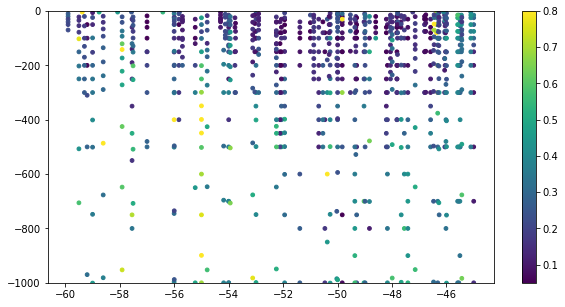

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
im = ax.scatter(Ind['Lat (degN)'], -Ind['depth'], c=Ind['dFe (nM)'], s=14,
               vmax=0.8, vmin=0.05)
ax.set_ylim([-1e3,0.])
fig.colorbar(im,ax=ax)

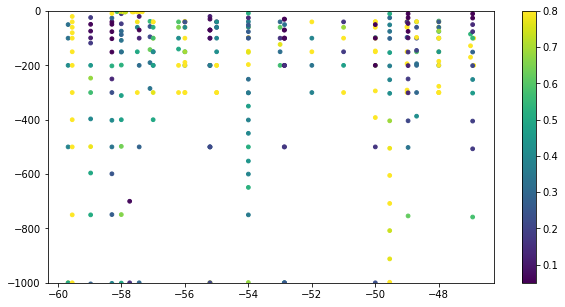

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
im = ax.scatter(Atl['Lat (degN)'], -Atl['depth'], c=Atl['dFe (nM)'], s=14,
               vmax=0.8, vmin=0.05)
ax.set_ylim([-1e3,0.])
fig.colorbar(im,ax=ax)

In [44]:
dfSO.loc[dfSO.index==121]['long (degE)'].values[0]

69.83

In [46]:
l = 0
ddeg = 1.
for i in dfSO.index:
    if np.isnan(dfSO.loc[dfSO.index==i]['long (degE)'].values[0]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dfSO.loc[dfSO.index==i]['long (degE)'].values[0]))
        k = np.argmin(np.abs(saf.lon-dfSO.loc[dfSO.index==i]['long (degE)'].values[0]))

        if dfSO.loc[dfSO.index==i]['Lat (degN)'].values[0]>=pf.lat[j]-ddeg and dfSO.loc[dfSO.index==i]['Lat (degN)'].values[0]<=saf.lat[k]+ddeg:        
            if l == 0:
                acc = dfSO.loc[dfSO.index==i]
            else:
                acc = pd.concat([acc,dfSO.loc[dfSO.index==i]], 
                                ignore_index=True)
            l += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behavi

month  year  long (degE)  Lat (degN)  depth  dFe (nM)  \
0       10  1995      72.6700     -47.730   40.0      0.46   
1       10  1995      71.8000     -48.500   40.0      0.52   
2       10  1995      71.8000     -47.800   40.0      0.99   
3       10  1995      69.9800     -48.300   40.0      6.39   
4       10  1995      71.0200     -48.000   40.0      5.30   
5       10  1995      72.6700     -48.470   40.0      0.71   
6       10  1995      73.5800     -48.000   40.0      4.11   
7        4  1999      20.0000     -49.330   20.0      0.18   
8        4  1999      20.0000     -49.830   20.0      0.05   
9        4  1999      20.0000     -48.830   20.0      0.43   
10       4  1999      20.0000     -49.330   40.0      0.13   
11       4  1999      20.0000     -48.830   40.0      0.24   
12       4  1999      20.0000     -49.830   40.0      0.09   
13       4  1999      20.0000     -49.330   60.0      0.05   
14       4  1999      20.0000     -49.330   80.0      0.08   
15       4  1999      20.0000     -49.830   80.0      0.09   
16       4  1999      20.0000     -49.330  100.0      0.13   
17       4  1999      20.0000     -48.830  100.0      0.10   
18       4  1999      20.0000     -49.830  100.0      0.09   
19       4  1999      20.0000     -49.330  129.0      0.15   
20       4  1999      20.0000     -49.330  150.0      0.13   
21       4  1999      20.0000     -48.830  150.0      0.51   
22       4  1999      20.0000     -49.830  150.0      0.19   
23       4  1999      20.0000     -48.830  250.0      0.35   
24       4  1999      20.0000     -49.330  250.0      0.08   
25       4  1999      20.0000     -49.830  250.0      0.10   
26       4  1999      20.0000     -49.330  293.0      0.23   
27       4  1999      20.0000     -48.830  298.0      0.21   
28       4  1999      20.0000     -48.830  478.0      0.64   
29       4  1999      20.0000     -49.830  500.0      0.25   
..     ...   ...          ...         ...    ...       ...   
671      2  2007      88.3034     -52.251  140.7      0.22   
672      2  2007      88.3034     -52.251  172.0      0.26   
673      2  2007      88.3034     -52.251  224.2      0.13   
674      2  2007      88.3034     -52.251  272.2      0.25   
675      2  2007      88.3034     -52.251  424.2      0.54   
676      2  2007      88.3034     -52.251  647.6      0.35   
677      2  2007      88.3034     -52.251  949.1      0.52   
678      2  2007      92.3495     -47.994   22.3      0.17   
679      2  2007      92.3495     -47.994   40.4      0.13   
680      2  2007      92.3495     -47.994   63.6      0.23   
681      2  2007      92.3495     -47.994   86.7      0.30   
682      2  2007      92.3495     -47.994  106.8      0.47   
683      2  2007      92.3495     -47.994  137.9      0.33   
684      2  2007      92.3495     -47.994  186.9      0.30   
685      2  2007      92.3495     -47.994  235.2      0.27   
686      2  2007      92.3495     -47.994  288.5      0.33   
687      2  2007      92.3495     -47.994  491.6      0.50   
688      2  2007      92.3495     -47.994  982.5      0.58   
689      2  2007      93.1585     -47.150   20.7      0.10   
690      2  2007      93.1585     -47.150   46.0      0.19   
691      2  2007      93.1585     -47.150   71.3      0.17   
692      2  2007      93.1585     -47.150   95.2      0.15   
693      2  2007      93.1585     -47.150  123.9      0.15   
694      2  2007      93.1585     -47.150  140.9      0.16   
695      2  2007      93.1585     -47.150  174.4      0.19   
696      2  2007      93.1585     -47.150  222.3      0.18   
697      2  2007      93.1585     -47.150  272.5      0.32   
698      2  2007      93.1585     -47.150  428.8      0.47   
699      2  2007      93.1585     -47.150  647.3      0.51   
700      2  2007      93.1585     -47.150  951.4      0.56   

                                             Reference  
0    Blain, S., P. Treguer, S. Belviso, E. Bucciare...  
1    Blain, S., P. Treguer, S. Belviso, E. Buc

In [47]:
acc

month  year  long (degE)  Lat (degN)  depth  dFe (nM)  \
0       10  1995      72.6700     -47.730   40.0      0.46   
1       10  1995      71.8000     -48.500   40.0      0.52   
2       10  1995      71.8000     -47.800   40.0      0.99   
3       10  1995      69.9800     -48.300   40.0      6.39   
4       10  1995      71.0200     -48.000   40.0      5.30   
5       10  1995      72.6700     -48.470   40.0      0.71   
6       10  1995      73.5800     -48.000   40.0      4.11   
7        4  1999      20.0000     -49.330   20.0      0.18   
8        4  1999      20.0000     -49.830   20.0      0.05   
9        4  1999      20.0000     -48.830   20.0      0.43   
10       4  1999      20.0000     -49.330   40.0      0.13   
11       4  1999      20.0000     -48.830   40.0      0.24   
12       4  1999      20.0000     -49.830   40.0      0.09   
13       4  1999      20.0000     -49.330   60.0      0.05   
14       4  1999      20.0000     -49.330   80.0      0.08   
15       4  1999      20.0000     -49.830   80.0      0.09   
16       4  1999      20.0000     -49.330  100.0      0.13   
17       4  1999      20.0000     -48.830  100.0      0.10   
18       4  1999      20.0000     -49.830  100.0      0.09   
19       4  1999      20.0000     -49.330  129.0      0.15   
20       4  1999      20.0000     -49.330  150.0      0.13   
21       4  1999      20.0000     -48.830  150.0      0.51   
22       4  1999      20.0000     -49.830  150.0      0.19   
23       4  1999      20.0000     -48.830  250.0      0.35   
24       4  1999      20.0000     -49.330  250.0      0.08   
25       4  1999      20.0000     -49.830  250.0      0.10   
26       4  1999      20.0000     -49.330  293.0      0.23   
27       4  1999      20.0000     -48.830  298.0      0.21   
28       4  1999      20.0000     -48.830  478.0      0.64   
29       4  1999      20.0000     -49.830  500.0      0.25   
..     ...   ...          ...         ...    ...       ...   
671      2  2007      88.3034     -52.251  140.7      0.22   
672      2  2007      88.3034     -52.251  172.0      0.26   
673      2  2007      88.3034     -52.251  224.2      0.13   
674      2  2007      88.3034     -52.251  272.2      0.25   
675      2  2007      88.3034     -52.251  424.2      0.54   
676      2  2007      88.3034     -52.251  647.6      0.35   
677      2  2007      88.3034     -52.251  949.1      0.52   
678      2  2007      92.3495     -47.994   22.3      0.17   
679      2  2007      92.3495     -47.994   40.4      0.13   
680      2  2007      92.3495     -47.994   63.6      0.23   
681      2  2007      92.3495     -47.994   86.7      0.30   
682      2  2007      92.3495     -47.994  106.8      0.47   
683      2  2007      92.3495     -47.994  137.9      0.33   
684      2  2007      92.3495     -47.994  186.9      0.30   
685      2  2007      92.3495     -47.994  235.2      0.27   
686      2  2007      92.3495     -47.994  288.5      0.33   
687      2  2007      92.3495     -47.994  491.6      0.50   
688      2  2007      92.3495     -47.994  982.5      0.58   
689      2  2007      93.1585     -47.150   20.7      0.10   
690      2  2007      93.1585     -47.150   46.0      0.19   
691      2  2007      93.1585     -47.150   71.3      0.17   
692      2  2007      93.1585     -47.150   95.2      0.15   
693      2  2007      93.1585     -47.150  123.9      0.15   
694      2  2007      93.1585     -47.150  140.9      0.16   
695      2  2007      93.1585     -47.150  174.4      0.19   
696      2  2007      93.1585     -47.150  222.3      0.18   
697      2  2007      93.1585     -47.150  272.5      0.32   
698      2  2007      93.1585     -47.150  428.8      0.47   
699      2  2007      93.1585     -47.150  647.3      0.51   
700      2  2007      93.1585     -47.150  951.4      0.56   

                                             Reference  
0    Blain, S., P. Treguer, S. Belviso, E. Bucciare...  
1    Blain, S., P. Treguer, S. Belviso, E. Buc

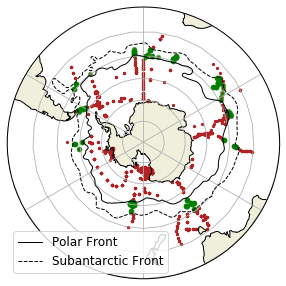

In [54]:
fig = plt.figure(figsize=(5,5))
# fig.set_tight_layout(True)
# ax = fig.add_subplot(111)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
ax.scatter(dfSO.loc[dfSO['depth'] < 100.]['long (degE)'].values, 
          dfSO.loc[dfSO['depth'] < 100.]['Lat (degN)'].values, 
          s=5., c='firebrick', rasterized=True, transform=ccrs.PlateCarree())
# ax.scatter(Ker.loc[dfSO['depth'] < 30.]['long (degE)'].values,
#            Ker.loc[dfSO['depth'] < 30.]['Lat (degN)'].values,
#            s=30., c='yellow', alpha=0.6, label='Kerguelen', transform=ccrs.PlateCarree())
ax.scatter(acc.loc[acc['depth'] < 100.]['long (degE)'].values,
          acc.loc[acc['depth'] < 100.]['Lat (degN)'].values,
          s=20., c='green', alpha=0.5, rasterized=True, transform=ccrs.PlateCarree())
# ax.set_title("Geotraces Iron profiles", fontsize=13)
ax.plot(pf.lon, pf.lat-1, 'k', lw=1, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat+1, 'k--', lw=1, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower left', fontsize=12)
# fig.subplots_adjust(right=0.82)
# cbar_ax = fig.add_axes([0.85, 0.24, 0.03, 0.54])
# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar.set_label(r"u [m s$^{-1}$]", fontsize=14)
plt.savefig(op.join(ddir,'Loc-of-SO_Geostraces.pdf'))

In [48]:
znew = np.append(np.arange(-10,-110,-10), np.arange(-150,-1050,-50))
znew

array([  -10,   -20,   -30,   -40,   -50,   -60,   -70,   -80,   -90,
        -100,  -150,  -200,  -250,  -300,  -350,  -400,  -450,  -500,
        -550,  -600,  -650,  -700,  -750,  -800,  -850,  -900,  -950,
       -1000])

In [49]:
# Ker_sorted = Ker.sort_values(['Lat (degN)','depth']).loc[Ker['depth']>=1e1]
acc_sorted = acc.sort_values(['Lat (degN)','depth'])
acc_sorted

month  year  long (degE)  Lat (degN)  depth  dFe (nM)  \
206      1  1998   -170.00000   -61.00000    5.0   0.07000   
207      1  1998   -170.00000   -61.00000   10.0   0.09000   
217      1  1998   -170.00000   -61.00000   20.0   0.09000   
81       1  1998   -170.00000   -61.00000   25.0   0.03072   
130      4  1995    -89.50000   -61.00000   25.0   0.05000   
82       1  1998   -170.00000   -61.00000   50.0   0.03072   
134      4  1995    -89.50000   -61.00000   50.0   0.06000   
238      1  1998   -170.00000   -61.00000   60.0   0.10000   
83       1  1998   -170.00000   -61.00000   75.0   0.03072   
136      4  1995    -89.50000   -61.00000   75.0   0.13000   
247      1  1998   -170.00000   -61.00000   80.0   0.10000   
84       1  1998   -170.00000   -61.00000  100.0   0.03072   
140      4  1995    -89.50000   -61.00000  100.0   0.08000   
253      1  1998   -170.00000   -61.00000  100.0   0.09000   
85       1  1998   -170.00000   -61.00000  150.0   0.04096   
143      4  1995    -89.50000   -61.00000  150.0   0.13000   
257      1  1998   -170.00000   -61.00000  150.0   0.08000   
86       1  1998   -170.00000   -61.00000  200.0   0.12288   
148      4  1995    -89.50000   -61.00000  200.0   0.13000   
263      1  1998   -170.00000   -61.00000  200.0   0.11000   
267      1  1998   -170.00000   -61.00000  250.0   0.23000   
151      4  1995    -89.50000   -61.00000  300.0   0.07000   
275      1  1998   -170.00000   -61.00000  300.0   0.22000   
156      4  1995    -89.50000   -61.00000  400.0   0.18000   
158      4  1995    -89.50000   -61.00000  600.0   0.23000   
162      4  1995    -89.50000   -61.00000  800.0   0.26000   
214     12  1997   -168.00000   -60.90000   20.0   0.24000   
230     12  1997   -168.00000   -60.90000   40.0   0.25000   
233     12  1997   -168.00000   -60.90000   50.0   0.24000   
242     12  1997   -168.00000   -60.90000   60.0   0.23000   
..     ...   ...          ...         ...    ...       ...   
341     11  2004     51.79093   -46.05961   40.0   0.19000   
342     11  2004     51.79093   -46.05961   80.0   0.28000   
381     12  2004     51.77591   -46.05134    5.0   0.24000   
382     12  2004     51.77591   -46.05134   25.0   0.27000   
383     12  2004     51.77591   -46.05134   55.0   0.12000   
384     12  2004     51.77591   -46.05134  100.0   0.41000   
385     12  2004     51.77591   -46.05134  200.0   0.15000   
390      1  2005     51.86656   -46.03412    5.0   0.15000   
391      1  2005     51.86656   -46.03412   20.0   0.23000   
392      1  2005     51.86656   -46.03412   80.0   0.10000   
393      1  2005     51.86656   -46.03412  150.0   0.09000   
394      1  2005     51.86656   -46.03412  300.0   0.34000   
395      1  2005     51.86656   -46.03412  500.0   0.20000   
343     11  2004     49.00242   -45.49943   35.0   0.29000   
344     11  2004     49.00242   -45.49943   55.0   0.27000   
345     11  2004     49.00242   -45.49943   75.0   0.44000   
346     11  2004     49.00242   -45.49943  100.0   0.34000   
347     11  2004     49.00242   -45.49943  125.0   0.23000   
348     11  2004     49.00242   -45.49943  150.0   0.46000   
349     11  2004     49.00242   -45.49943  200.0   0.20000   
350     11  2004     49.00242   -45.49943  300.0   0.26000   
351     11  2004     49.00242   -45.49943  400.0   0.40000   
352     11  2004     49.00242   -45.49943  500.0   0.23000   
665      2  2007     54.13000   -45.11000    4.0   0.38000   
353     12  2004     49.96059   -44.52528    5.0   0.48000   
354     12  2004     49.96059   -44.52528   15.0   0.40000   
355     12  2004     49.96059   -44.52528   35.0   0.31000   
356     12  2004     49.96059   -44.52528   75.0   0.30000   
357     12  2004     49.96059   -44.52528  125.0   0.16000   
358     12  2004     49.96059   -44.52528  200.0   0.30000   

                                             Reference  
206  Measures, C.I. and S. Vink, 2001.  Dissolved F...  
207  Measures, C.I. and S. Vink, 2001.  Dissol

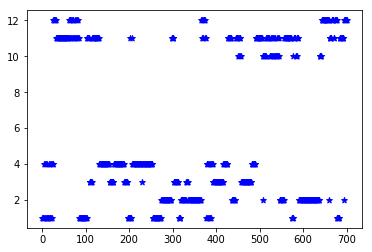

In [50]:
fig, ax = plt.subplots()
ax.scatter(range(acc_sorted.shape[0]), acc_sorted.month, marker='*', color='b')
# ax.scatter(range(Ker.shape[0]), Ker.month, marker='^', color='r')

In [167]:
# lats = Ker_sorted['Lat (degN)'].unique()
# months = Ker_sorted['month'].unique()
# anewK = np.empty((len(znew),len(lats)))
# anewK[:] = np.nan
# print(anewK.shape)
# from scipy.interpolate import interp1d
# k = 0
# for i in lats:
#     zs = Ker_sorted.loc[Ker_sorted['Lat (degN)'] == i]['depth'].values
#     if len(zs) == len(np.unique(zs)):
# #         print(zs)
#         Fe = medfilt(Ker_sorted.loc[Ker_sorted['Lat (degN)'] == i]['dFe (nM)'].values,3)
#         func = pchip(zs, Fe, extrapolate=False)
#         anewK[:,k] = func(np.abs(znew))
#     else:
#         pass
#     k += 1
# anewK = xr.DataArray(anewK, dims=['Z','Lat'], coords={'Z':znew,'Lat':lats})
# # anewK = anew.where(anewK<=Ker['dFe (nM)'].max()).where(anewK>=Ker['dFe (nM)'].min())
# anewK

In [55]:
lats = acc_sorted['Lat (degN)'].unique()
months = acc_sorted['month'].unique()
anewI = np.empty((len(znew),len(lats)))
anewI[:] = np.nan
k = 0
for i in lats:
    zs = acc_sorted.loc[acc_sorted['Lat (degN)'] == i]['depth'].values
    if len(zs) == len(np.unique(zs)):
        Fe = medfilt(acc_sorted.loc[acc_sorted['Lat (degN)'] == i]['dFe (nM)'].values,3)
        if len(Fe) > 1:
            func = pchip(zs, Fe, extrapolate=False)
            anewI[:,k] = func(np.abs(znew))
        else:
            pass
    else:
        pass
    k += 1
anewI = xr.DataArray(anewI, dims=['Z','Lat'], coords={'Z':znew,'Lat':lats})
anewI = anewI.where(anewI<=acc['dFe (nM)'].max())
anewI

<xarray.DataArray (Z: 28, Lat: 76)>
array([[     nan,      nan,      nan, ...,      nan,      nan, 0.4     ],
       [     nan, 0.24    , 0.03072 , ...,      nan,      nan, 0.386431],
       [     nan, 0.24    , 0.26634 , ...,      nan,      nan, 0.325542],
       ...,
       [     nan,      nan, 0.24576 , ...,      nan,      nan,      nan],
       [     nan,      nan, 0.24576 , ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])
Coordinates:
  * Z        (Z) int64 -10 -20 -30 -40 -50 -60 ... -800 -850 -900 -950 -1000
  * Lat      (Lat) float64 -61.0 -60.9 -60.8 -60.7 ... -45.5 -45.11 -44.53

[ 1  4 12 11  3  2 10]


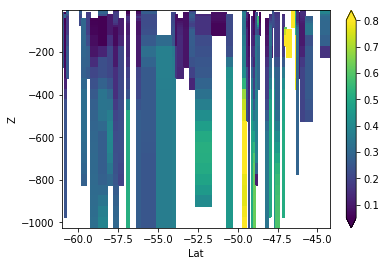

In [56]:
print(months)
anewI.plot(vmax=0.8,vmin=0.05)

In [71]:
# acc25 = np.zeros_like(anewI.Z)
# acc25[:] = np.nan
# acc75 = acc25.copy()

# for i in range(len(anewI.Z)):
#     print(anewI[i])
#     acc25[i] = np.nanpercentile(anewI[i].data, 25)
#     acc75[i] = np.nanpercentile(anewI[i].data, 75)
acc25 = np.nanpercentile(anewI.data, 25, axis=1)
acc75 = np.nanpercentile(anewI.data, 75, axis=1)
    
acc25

array([0.15102344, 0.0879757 , 0.117076  , 0.133     , 0.09      ,
       0.09      , 0.09      , 0.09      , 0.09      , 0.09      ,
       0.12460083, 0.13      , 0.14998223, 0.19874   , 0.20998444,
       0.21518519, 0.23      , 0.24576   , 0.29      , 0.27      ,
       0.27      , 0.27      , 0.27000485, 0.26547973, 0.29806239,
       0.3047916 , 0.30549603, 0.31560063])

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


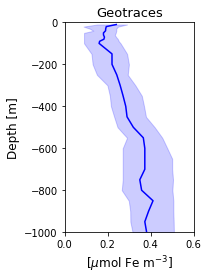

In [72]:
fig, ax = plt.subplots(figsize=(3,4))
fig.set_tight_layout(True)
# ax.plot(anewK.mean('Lat'), anewK.Z, 'r')
# ax.fill_betweenx(anewK.Z, (np.nanmean(anewK,axis=-1)-np.nanstd(anewK,axis=-1)), 
#                 (np.nanmean(anewK,axis=-1)+np.nanstd(anewK,axis=-1)),
#                 color='r', alpha=0.2)
ax.plot(np.nanmedian(anewI,axis=1), anewI.Z, 'b')
ax.fill_betweenx(anewI.Z, acc25, acc75,
                color='b', alpha=0.2)
ax.set_ylim([-1e3,0.])
ax.set_xlim([0,.6])
ax.set_xlabel(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
ax.set_ylabel(r"Depth [m]", fontsize=12)
ax.set_title(r"Geotraces", fontsize=13)
plt.savefig(op.join(ddir,'Fe_profile_Geotraces.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


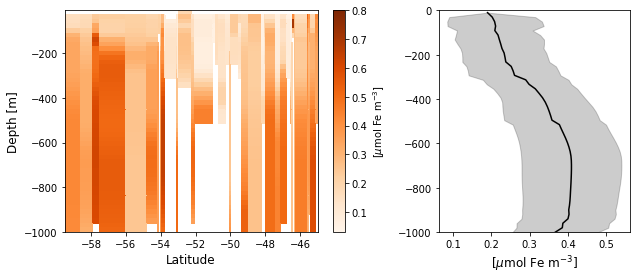

In [126]:
fig = plt.figure(figsize=(9,4))
fig.set_tight_layout(True)
ax1 = plt.subplot2grid((1,5),(0,0),colspan=3)
ax2 = plt.subplot2grid((1,5),(0,3),colspan=2)
im = ax1.pcolormesh(anew.Lat, anew.Z, anew, vmax=0.8, vmin=0.03, cmap='Oranges', rasterized=True)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax1.set_xlabel(r"Latitude", fontsize=12)
ax2.plot(anew.mean('Lat'), anew.Z, 'k')
ax2.fill_betweenx(anew.Z, (anew.mean('Lat')-anew.std('Lat')), (anew.mean('Lat')+anew.std('Lat')),
                 color='k', alpha=0.2)
ax2.set_ylim([-1e3,0.])
ax2.set_xlabel(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
# ax2.set_ylabel(r"Z [m]", fontsize=12)
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label(r"[$\mu$mol Fe m$^{-3}$]")
# fig.suptitle(r"Kerguelen", fontsize=15, y=1.01)
plt.savefig(op.join(ddir,'Kerguelen_Iron.pdf'))